# Практическая работа №2: Классические методы математической статистики
Выполнила студент гр. 1375 Оконечников Филипп. Вариант №19

## Цель работы
Научится применять методы математической статистики для решения задач статистического анализа; 
сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения

 $$\mathrm{L}\left(\vec{X}, \theta \right) = \prod \limits_{i = 1}^n p_{\theta}(x_i)$$
где $p_{\theta}(x)$ - плотность распределения
* Пусть $X_1, \ldots, X_n$ - выборка из распределения $p_{\theta}$ ; $\vec{\theta} = \left(\theta_1, \ldots, \theta_d \right)$ ; существует $\mu_k\left(\theta\right) = \mathbb{E}_{\theta}x_1^k, k = 1, \ldots, d$


* Статистика $\widehat{\Theta} : \mathcal{X} \rightarrow \mathcal{Y}$ , удовлетворяющая условию:
$$\mathbb{P}_{\theta}\left(\widehat{\Theta} \ni \theta\right) \geq 1 - \alpha$$ 
называется **доверительной оценкой** парамаетра $\theta$ уровня доверия $1 - \alpha$.

* Статистика $\widehat{\Theta} : \mathcal{X} \rightarrow \mathbb{R}^2$, удовлетворяющая условию
$$\mathbb{P}_{\theta}\left(\left[T_1\left(\vec{X}\right), T_2\left(\vec{X}\right)\right] \ni \theta\right) \geq 1 - \alpha, \forall \theta \in \Theta$$
назвается **доверительным интервалом** параметра $\theta$ уровня доверия $1 - \alpha$.

* **Простая гипотеза** - одноточечная гипотеза, определяющая точное значение параметра:
$$H: \theta = \theta^*$$

* **Нерандомизированный критерий**, если результаты наблюдений одзнозначно определяют решение:
$$\phi: \mathcal{X} \rightarrow \{0,1\}$$

* **Статистика отношения правдоподобия:** $\mathrm{LR}\left(X, \theta_1, \theta_0\right) = \frac{\mathrm{L}\left(X, \theta_1\right)}{\mathrm{L}\left(X, \theta_0\right)}$

* **Лемма Неймана-Пирсона:** существует более мощный критерий уровня значимости $\alpha$ вида:
$$\phi(x) =\left\{\begin{array}{l} 1, \mathrm{LR} > c \\ \mathrm{LR} = c  \\ 0, \mathrm{LR} < c \\ \end{array}\right.$$
где константа $c$ и вероятность $p \in [0,1]$ определяются из уравнения: $\mathbb{E}_{\theta_0}\phi(x) = \mathbb{P}_{\theta_0}\left(\mathrm{LR}(x)>c\right) + p \cdot \mathbb{P}_{\theta_0}\left(\mathrm{LR}(x)=c\right) = \alpha$


## Постановка задачи
Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Задание 1
### a) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.

In [209]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stat
import math
from scipy.stats import chi2, norm, kstest, kstwobign, t, poisson, geom, expon, gamma
from scipy.integrate import quad

data_1 = [11, 12, 3, 2, 6, 14, 3, 6, 0, 3, 9, 10, 5, 3, 0, 4, 4, 6, 4, 1, 0, 7, 5, 4, 0, 5, 12, 4, 0, 0, 5, 6, 19, 4, 0, 2, 11, 3, 2, 0, 0, 4, 11, 2, 2, 2, 6, 7, 3, 8]
data_sort = [x for x in data_1]
data_sort.sort()
n = len(data_1)

In [210]:
#вариационный ряд

def variation(data):
    data.sort()
    data = [str(i) for i in data]
    return ','.join(data)
print( "Вариационный ряд:", data_sort)

#print(data.count(0)/n) #частота
#print(data.count(1)/n)
#print(data.count(2)/n)
#print(data.count(3)/n)

Вариационный ряд: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 8, 9, 10, 11, 11, 11, 12, 12, 14, 19]


Таким образом, вариационный ряд:
 $$\vec{X}^\prime = \left(0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,4,5,5,5,5,6,6,6,6,6,7,7,8,9,10,11,11,11,12,12,14,19 \right)$$

c:\Users\79062\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\79062\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


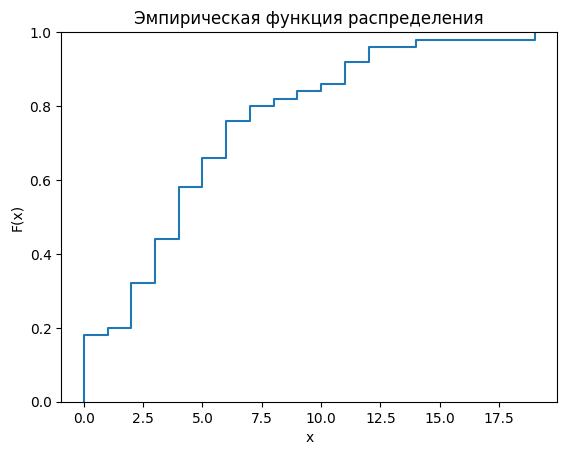

In [211]:
def F(x): #эмпирическая функция распределения P(X < x)
    sum_i = 0
    for item in data_1:
        if item < x:
            sum_i += 1 #сумма индикаторов
    return sum_i/n

sns.ecdfplot(data_1) #построение эмпирической функции распределения

plt.title("Эмпирическая функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

| $x_{i}$ | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 14 | 19 |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| $n_{i}$ | 0 | 9 | 10 | 16 | 22 | 29 | 33 | 38 | 40 | 41 | 42  | 43  | 46  | 48  | 49  |
| $w_{i}$ | 0 | 0.18 | 0.2 | 0.32 | 0.44 | 0.58 | 0.66 | 0.72 | 0.8 | 0.82 | 0.84 | 0.86 | 0.92 | 0.96 | 0.98 |

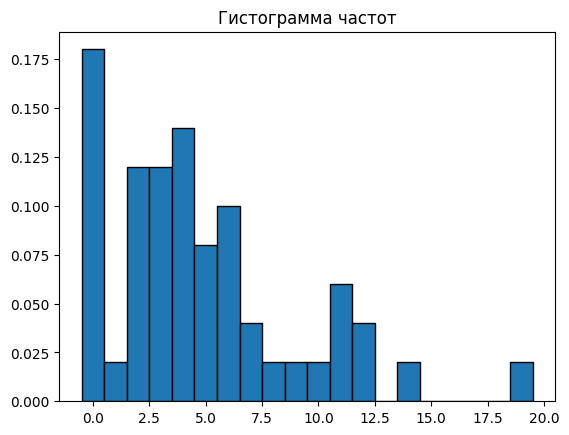

In [212]:
#гистограмма частот

hist = plt.hist(data_1, edgecolor='black', bins=20, weights=np.ones_like (data_1) / n, range=(min(data_1)-0.5, max(data_1)+0.5))
plt.title('Гистограмма частот');

| $x_{i}$ | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 14 | 19 |
|---------|---|---|---|---|---|---|---|---|---|---|----|----|----|----|----|
| $n_{i}$ | 9 | 1 | 6 | 6 | 7 | 4 | 5 | 2 | 1 | 1 | 1  | 3  | 2  | 1  | 1  |
| $w_{i}$ | 0.18 | 0.02 | 0.12 | 0.12 | 0.14 | 0.08 | 0.1 | 0.04 | 0.02 | 0.02 | 0.02  | 0.06  | 0.04  | 0.02  | 0.02  |

### 1.b Вычислить выборочные аналоги следующих числовых характеристик:

In [213]:
#Математическое ожидание

mean_sum = 0
for x in data_1:
    mean_sum = mean_sum + x
mean = mean_sum / n
print(f'Математическое ожидание: {mean}')

Математическое ожидание: 4.8


Получаем выборочный аналог математического ожидания - выборочное среднее:
$$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i= 4.8$$

In [214]:
#Выборочный аналог дисперсии и СКО

disp_help = 0
for x in data_1:
    disp_help = disp_help + ((x - mean) ** 2)
disp = round(disp_help / n, 2)
print(f'Дисперсия: {disp}')

s = disp**0.5 #выборочное СКО

print("Выборочное СКО: ", s)

Дисперсия: 17.4
Выборочное СКО:  4.171330722922842


Получаем выборочный аналог дисперсии и СКО - выборочную дисперсию и выборочное СКО: 
$$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)=17.4$$ 
$$S=\sqrt{S^2}=4.17$$

In [215]:
#Выборочная медиана

print(f'X_[25] = {data_1[24]}, X_[26] = {data_1[26]}')

X_[25] = 0, X_[26] = 12


Выборочная медиана: <br><br>
$$np = 50\cdot\frac{1}{2}=25\in \mathbb Z \Rightarrow \large z_{50,\frac{1}{2}} = \normalsize \left[ X_{(25)},X_{(26)} \right) = \left[4,4\right) = 4$$

In [216]:
#Выборочная асимметрия

assimetry_help = 0
for x in data_1:
    assimetry_help = assimetry_help + ((x - mean) ** 3)
assimetry = round(assimetry_help / (n *(s ** 3)),2)
print(f'Коэффициент ассиметрии: {assimetry}')

Коэффициент ассиметрии: 1.15


Выборочный коэффициент асимметрии: 
$$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3} = 1.15$$

In [217]:
excess_help = 0
for x in data_1:
    excess_help = excess_help + ((x - mean) ** 4)
excess = round(excess_help / (n * (disp ** 2)), 3)-3

print(f'Коэффициент эксцесса: {excess}')

Коэффициент эксцесса: 1.245


Выборочный коэффициент эксцесса:
$$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3 = 1.245$$

In [218]:
def F(y):
    for i in range(n):
        if data_sort[i] >= y:
            return i
    return n - 1

a = 2.81
b = 9.38
print(f'F(a) = {F(a)/n}, F(b) = {F(b)/n}')
print(f'F(b) - F(a) = {(F(b) - F(a))/n}')

F(a) = 0.32, F(b) = 0.84
F(b) - F(a) = 0.52


Выборочный аналог $\mathbb{P}\left(x \in \left[a, b\right]\right)$, a = 2.81, b = 9.38: <br><br>

$$\mathbb{P}\left(x \in \left[a, b\right]\right) = \mathrm{F}(b) - \mathrm{F}(a) = 0.84 - 0.32 = 0.52$$
 где $\mathrm{F}(x)$ - эмпирическая функция распределения

### 1.c В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок. <br><br>

**Плотность распределения пуассона**: 
$$\large q_{\theta} = \frac{\lambda^x}{x!}e^{-\lambda}$$

***Оценка максимального правдоподобия:***<br><br>
$ L\left(\vec{X}, \theta \right) =\prod\limits_{i = 1}^nq_{\theta}\left(\normalsize x_i\right)=\prod\limits_{i = 1}^n\frac{\lambda^x_i}{x_i!}e^{-\lambda} = \large \lambda^{\sum \limits_{i=1}^{n}x_i} \cdot e^{-n\lambda} \cdot \prod\limits_{i = 1}^n\frac{1}{x_i!}$ <br><br>

$LL\left(\vec{X}, \theta \right) = \sum \limits_{i=1}^{n}x_i \cdot \ln{\lambda} - n\lambda + \ln{\left(\prod\limits_{i = 1}^n\frac{1}{\large x_i!}\right)}$ <br><br>

$\Large \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i=1}^{n}x_i}{\lambda} \normalsize - n = 0 \Rightarrow \widehat{\theta} = \widehat{\lambda} = \overline{X}$ - ОМП <br><br>

$\large \mathbb{E}_{\theta}\widehat{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i=1}^{n}x_i = \frac{1}{n} \cdot \normalsize n \cdot \lambda = \lambda \Rightarrow$ несмещённая оценка. <br><br>

***Оценка методом моментов:***<br><br>
$\mathbb{E}X_1 = \lambda$ - математическое ожидание (теоретический первый момент)<br><br> 
$\mathrm{M_1} = \overline{X}$ - выборочное среднее (выборочный первый момент)<br><br>
Следовательно, $\widetilde{\theta} = \widetilde{\lambda} = \overline{X}$<br><br>

$\large \mathbb{E}_{\theta}\widetilde{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i=1}^{n}x_i = \frac{1}{n} \cdot \normalsize n \cdot \lambda = \lambda \Rightarrow$ несмещённая оценка.


### 1.d Построить асимптотичексий доверительный интервал уровня значимости $\alpha_1 = 0.02$ для параметра $\lambda$ на базе оценки максимального правдоподобия. <br>
 **Плотность распределения пуассона**: 
$$\large q_{\theta} = \frac{\lambda^x}{x!}e^{-\lambda}$$

* Построение АДИ на базе ОМП:

Из пункта 1.с:<br>

$\widehat{\theta} = \widehat{\lambda} = \overline{X}$<br>

$\Large \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i=1}^{n}x_i}{\lambda} \normalsize - n$<br>

$\Large \frac{\partial^2 LL}{\partial \lambda^2} = \normalsize - \Large \frac{\sum \limits_{i=1}^{n}x_i}{\lambda^2}$<br>

$\mathrm{I}_n(\lambda) = - \large \mathbb{E}_{\theta}\frac{\partial^2 LL}{\partial \lambda^2} = \mathbb{E}_{\theta} \left(\frac{\sum \limits_{i=1}^{n}x_i}{\lambda^2}\right) = \frac{1}{\lambda^2}\sum \limits_{i=1}^{n}\mathbb{E}_{\theta}x_i = \frac{1}{\lambda^2} \cdot n \cdot \lambda = \Large \frac{n}{\lambda}$ <br>

$\mathrm{I}(\lambda) = \lim \limits_{n \to \infty} \large \frac{1}{\lambda} = \frac{1}{\lambda}$ <br>

**Квантили:** 

Так как распределение симметричное: <br><br>
$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.02}{2} = 0.99$, где $\alpha = \alpha_1 = 0.02$<br><br>
$\mathrm{\Phi}(x_{\alpha}) = 0.99 \Rightarrow x_{\alpha} = 2.33$ (посчитано в коде с использованием scipy.stats).

*Асимптотический доверительный интервал:* <br><br>
$\left[\overline{X} - \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha}\right] \ni \lambda$

Таким образом, АДИ уровня значимости $\alpha_1 = 0.02$ для параметра $\lambda$:
$$\left[4.07,5.52\right] \ni \lambda$$

* Построение АДИ на базе асимптотически нормальной оценки параметра:

*Асимптотическая нормальность:*

$\sqrt{n}\left(\overline{X} - \lambda\right) \sim \mathcal{N}\left(0, \mathbb{D}x\right)$

Тогда получим:

$\sqrt{n}\frac{\left(\overline{X} - \lambda\right)}{\sqrt{\lambda}} \sim \mathcal{N}\left(0, 1\right)$

Так как распределение симметричное: <br><br>
$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.02}{2} = 0.99$, где $\alpha = \alpha_1 = 0.02$<br><br>
$\mathrm{\Phi}(x_{\alpha}) = 0.99 \Rightarrow x_{\alpha} = 0.816$ (посчитано в коде с использованием scipy.stats).

*Асимптотический доверительный интервал:* <br><br>
(Далее будут приведены окгруглённые до двух знаков после запятой значения, посчитанные в коде)
1) $\mathbb{D}x = \lambda$. Заменим в знаменателе параметр на выборочную дисперсию:

$\mathbb{P}_{\theta}\left(-x_{\alpha} \leq \sqrt{n} \cdot \frac{\overline{X} - \lambda}{\sqrt{S^2}} \leq x_{\alpha}\right) \approx 1 - \alpha$

$\mathbb{P}_{\theta}\left(\overline{X} - \frac{S}{\sqrt{n}} \cdot x_{\alpha} \leq \lambda \leq \overline{X} + \frac{S}{\sqrt{n}} \cdot x_{\alpha}\right) \approx 1 - \alpha$

Таким образом, АДИ уровня значимости $\alpha_1 = 0.02$ для параметра $\lambda$:
$$\left[4.03,5.54\right] \ni \lambda$$

2) В знаменателе заменим параметр на $\overline{X}$:

$\mathbb{P}_{\theta}\left(-x_{\alpha} \leq \sqrt{n} \cdot \frac{\overline{X} - \lambda}{\sqrt{\overline{X}}} \leq x_{\alpha}\right) \approx 1 - \alpha$

$\mathbb{P}_{\theta}\left(\overline{X} - \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha} \leq \lambda \leq \overline{X} + \sqrt{\frac{\overline{X}}{n}}\right) \approx 1 - \alpha$

Таким образом, АДИ уровня значимости $\alpha_1 = 0.02$ для параметра $\lambda$:
$$\left[4.4,5.2\right] \ni \lambda$$

In [219]:
x_alpha = 0
while norm.cdf(x_alpha) <= 0.9:
    x_alpha += 0.01
print('x_alpha =', x_alpha)
aci = []

left_1 = mean - x_alpha * (mean / n)**0.5 #подсчёт левой границы АДИ
aci.append(left_1)
right_1 = mean + x_alpha * (mean / n)**0.5 #подсчёт правой границы АДИ
aci.append(right_1)
print("1) Асимптотический доверительный интервал: ", aci)

left_2 = mean - (s / n**0.5) * x_alpha
right_2 =  mean + (s / n**0.5) * x_alpha
print("2) Асимптотический доверительный интервал: ", [left_2, right_2])

left_3 = mean - x_alpha * (mean / n)**0.5
right_3 = mean + x_alpha * (mean / n)**0.5
print("3) Асимптотический доверительный интервал: ", [left_3, right_3])

x_alpha = 1.290000000000001
1) Асимптотический доверительный интервал:  [4.400308118671394, 5.199691881328605]
2) Асимптотический доверительный интервал:  [4.039009329886364, 5.560990670113636]
3) Асимптотический доверительный интервал:  [4.400308118671394, 5.199691881328605]


### 1.е Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0 = 6.00$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.02$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Разобьём числовую прямую на интервалы: $G_1 = \left(- \infty, 3.5\right]$,  $G_2 = \left(3.5, 4.5\right]$, $G_3 = \left(4.5, 5.5\right]$, $G_4 = \left(5.5, 6.5\right]$  $G_5 = \left(6.5, +\infty\right)$

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} q_{\theta}(x)$, где $q_{\theta}(x)$ - плотность распределения Пуассона.

$\mathbb{P}_{1} = 0.15$ <br> 

$\mathbb{P}_{2} = 0.13$ <br>

$\mathbb{P}_{3} = 0.16$ <br>

$\mathbb{P}_{4} = 0.16$ <br>

$\mathbb{P}_{5} = 0.08$ <br>

Получили статистику критерия $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 46.65$<br>
Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{2, 0.2}^2 = 7.82$ <br>

$\chi^2 > \chi_{2, 0.2}^2 \Rightarrow$ гипотезу отвергаем, так как статистика критерия попадает в критическую облать.

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 6.2 \cdot 10^{-17}$

In [220]:
lambda_0 = 6
alpha_1 = 0.02

edges = [3.5, 4.5,5.5, 6.5,7.5, 19.5] #интервалы

#подсчёт вероятностей
p1 = poisson.cdf(edges[0], lambda_0)
p2 = poisson.cdf(edges[1], lambda_0) - poisson.cdf(edges[0], lambda_0)
p3 = poisson.cdf(edges[2], lambda_0) - poisson.cdf(edges[1], lambda_0)
p4 = poisson.cdf(edges[3], lambda_0) - poisson.cdf(edges[2], lambda_0)
p5 = 1 - p1 - p2 - p3 - p4
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)
print('P4 = ', p4, ', n*P4 = ', n * p4)
print('P5 = ', p5, ', n*P5 = ', n * p5)

#количество значений, попавших в интервал
groups = [[],[],[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_sort:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4, n5 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3]), len(groups[4])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3, ', n4 = ', n4, ', n5 = ', n5)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4) + ((n5 - n*p5)**2) / (n*p5)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha_1, 2))

if chi > chi2.ppf(1 - alpha_1, 2):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

#наибольший уровень значимости
alpha = 0.02
step = 0.0001
while chi > chi2.ppf(1 - alpha, 2):
    alpha -= step
print('Наибольший уровень значимости: ', alpha)

P1 =  0.15120388277664784 , n*P1 =  7.560194138832392
P2 =  0.13385261753998337 , n*P2 =  6.692630876999169
P3 =  0.16062314104797976 , n*P3 =  8.031157052398989
P4 =  0.1606231410479803 , n*P4 =  8.031157052399015
P5 =  0.3936972175874088 , n*P5 =  19.68486087937044
n1 =  22 , n2 =  7 , n3 =  4 , n4 =  5 , n5 =  2
Статистика критерия:  46.64932481910383
Табличное значение: 7.824046010856292
Гипотеза отвергается
Наибольший уровень значимости:  6.616343757592791e-17


### 1.f Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу на уровне значимости $\alpha_1 = 0.02$. Вычислить наибольшее значение значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Проведём группировку, как в пункте 1.е. В качестев параметра $\lambda$ возьмём его ОМП, то есть $\lambda = \overline{X} = 0.7$ 

$\mathbb{P}_{1} = 0.29$ <br> 

$\mathbb{P}_{2} = 0.18$ <br>

$\mathbb{P}_{3} = 0.17$ <br>

$\mathbb{P}_{4} = 0.14$ <br>

$\mathbb{P}_{5} = 0.21$ <br>

Получили статистику критерия $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 14.07$<br><br>
Из таблицы: $\chi_{k-1-r, \alpha_1}^2 = \chi_{4, 0.2}^2 = 13.39$ <br><br>
$\chi^2 > \chi_{1, 0.2}^2 \Rightarrow$ нет оснований принять гипотезу, так как статистика критерия не попадает в критическую облать.

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 0.015$

In [221]:
edges = [3.5, 4.5,5.5, 6.5,7.5, 19.5] #интервалы

#подсчёт вероятностей
p1 = poisson.cdf(edges[0], mean)
p2 = poisson.cdf(edges[1], mean) - poisson.cdf(edges[0], mean)
p3 = poisson.cdf(edges[2], mean) - poisson.cdf(edges[1], mean)
p4 = poisson.cdf(edges[3], mean) - poisson.cdf(edges[2], mean)
p5 = 1 - p1 - p2 - p3 - p4
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)
print('P4 = ', p4, ', n*P4 = ', n * p4)
print('P5 = ', p5, ', n*P5 = ', n * p5)

#количество значений, попавших в интервал
groups = [[],[],[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_sort:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4, n5 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3]), len(groups[4])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3, ', n4 = ', n4, ', n5 = ', n5)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4) + ((n5 - n*p5)**2) / (n*p5)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha_1, 5))

if chi > chi2.ppf(1 - alpha_1, 1):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

#наибольший уровень значимости
#наибольший уровень значимости
alpha = 0.02
step = 0.0001
while chi > chi2.ppf(1 - alpha, 5):
    alpha -= step
print('Наибольший уровень значимости: ', alpha)

P1 =  0.2942299164965642 , n*P1 =  14.71149582482821
P2 =  0.18202883712904422 , n*P2 =  9.101441856452212
P3 =  0.1747476836438835 , n*P3 =  8.737384182194175
P4 =  0.13979814691510573 , n*P4 =  6.989907345755286
P5 =  0.20919541581540235 , n*P5 =  10.459770790770119
n1 =  22 , n2 =  7 , n3 =  4 , n4 =  5 , n5 =  2
Статистика критерия:  14.073418665397545
Табличное значение: 13.38822259903634
Гипотеза отвергается
Наибольший уровень значимости:  0.01510000000000003


### 1.g Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $\lambda = \lambda_0 = 6.00$ при альтернативе пуассоновости с параметром $\lambda = \lambda_1 = 4.00$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.02$. Что получится, если поменять местами основную и альтернативную гипотезы?

*Нулевая гипотеза* $H_0: \lambda = \lambda_0 = 6$

*Альтернативная гипотеза* $H_1: \lambda = \lambda_1 = 4$

*Функция правдоподобия:*

$ L\left(\vec{X}, \theta \right) = \large \lambda^{\sum \limits_{i=1}^{n}x_i} \cdot e^{-n\lambda} \cdot \prod\limits_{i = 1}^n\frac{1}{x_i!}$

*Статистика отношения правдоподобия:*

$\mathrm{LR}\left(\vec{X}, \lambda_0, \lambda_1\right) = \frac{\mathrm{L}\left(\vec{X}, \lambda_1\right)}{\mathrm{L}\left(\vec{X}, \lambda_0\right)} = \left(\frac{\lambda_1}{\lambda_0}\right)^{\sum \limits_{i = 1}^n x_i} \cdot \exp{\left(-n\left(\lambda_1 - \lambda_0\right)\right)}$ - монотонная функция от $\sum \limits_{i = 1}^n x_i$

$\sum \limits_{i = 1}^n x_i \cdot \ln{\left(\frac{\lambda_1}{\lambda_0}\right)} + n\left(\lambda_0 - \lambda_1\right) > \ln{c}$

$\sum \limits_{i = 1}^n x_i \cdot \ln{\left(\frac{\lambda_1}{\lambda_0}\right)} > \ln{c} - n\left(\lambda_0 - \lambda_1\right)$

Так как $\lambda_0 > \lambda_1$, то меняем знак неравенства:

$\overline{X} < \large \frac{\ln{c} - n\left(\lambda_0 - \lambda_1\right)}{n \cdot \left(\ln{\lambda_1} - \ln{\lambda_0}\right) }$

В силу монотонности статистики LR относительно $\overline{X}$:

$\mathrm{LR} > c \iff \overline{X} < c^*$

$\mathrm{LR} < c \iff \overline{X} > c^*$

Тогда получим:

$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} < c^* \\ p, \overline{X} = c^* \\ 0, \overline{X} > c^*\\ \end{array}\right.$$
Используя ЦПТ, получаем эквивалентный критерий:

$\sqrt{n} \frac{\overline{X} - \mathbb{E}x}{\sqrt{\mathbb{D}}} \sim \mathcal{N}(0, 1)$ 

$\sqrt{n} \frac{\overline{X} - \lambda_0}{\sqrt{\lambda_0}}\sim \mathcal{N}(0, 1)$, при $H_0$

$\Phi\left(\sqrt{n} \frac{\overline{X} - \lambda_0}{\sqrt{\lambda_0}} \geq \sqrt{n} \frac{c^* - \lambda_0}{\sqrt{\lambda_0}}\right) =1 - \Phi\left(\sqrt{n} \frac{c^* - \lambda_0}{\sqrt{\lambda_0}}\right) = \alpha_1$

Квантиль:

$x_{\alpha} : \Phi(x_{\alpha}) = 1 - \alpha_1 = 1 - 0.02 = 0.98 \Rightarrow x_{\alpha} = 2.06$

$c^* = \frac{x_{\alpha} \sqrt{\lambda_0}}{\sqrt{n}} + \lambda_0 = 6.7$

$\overline{X} = 4.8$
$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} < 6.7 \\ p, \overline{X} = 6.7 \\ 0, \overline{X} > 6.7\\ \end{array}\right.$$
Так как $\overline{X}  < c^*$, то нет оснований принять гипотезу.

In [222]:
alpha_1 = 0.02
lambda_0 = 6

x_alpha = 0
while norm.cdf(x_alpha) <= 0.98:
    x_alpha += 0.01
print('x_alpha =', x_alpha)

c1_star = (x_alpha * (lambda_0**0.5)) / (n**0.5) + lambda_0
print('c* =', c1_star)

print('Среднее = ', mean)

x_alpha = 2.06
c* = 6.713604932718377
Среднее =  4.8


**Поменяем местами основную и альтернативную гипотезы**

*Нулевая гипотеза* $H_0: \lambda = \lambda_1 = 4$

*Альтернативная гипотеза* $H_1: \lambda = \lambda_0 = 6$

*Функция правдоподобия:*

$ L\left(\vec{X}, \theta \right) = \large \lambda^{\sum \limits_{i=1}^{n}x_i} \cdot e^{-n\lambda} \cdot \prod\limits_{i = 1}^n\frac{1}{x_i!}$

*Статистика отношения правдоподобия:*

$\mathrm{LR}\left(\vec{X}, \lambda_0, \lambda_1\right) = \frac{\mathrm{L}\left(\vec{X}, \lambda_0\right)}{\mathrm{L}\left(\vec{X}, \lambda_1\right)} = \left(\frac{\lambda_0}{\lambda_1}\right)^{\sum \limits_{i = 1}^n x_i} \cdot \exp{\left(-n\left(\lambda_0 - \lambda_1\right)\right)}$ - монотонная функция от $\sum \limits_{i = 1}^n x_i$

$\sum \limits_{i = 1}^n x_i \cdot \ln{\left(\frac{\lambda_0}{\lambda_1}\right)} + n\left(\lambda_1 - \lambda_0\right) > \ln{c}$

$\sum \limits_{i = 1}^n x_i \cdot \ln{\left(\frac{\lambda_0}{\lambda_1}\right)} > \ln{c} - n\left(\lambda_1 - \lambda_0\right)$

$\overline{X} > \large \frac{\ln{c} - n\left(\lambda_1 - \lambda_0\right)}{n \cdot \left(\ln{\lambda_0} - \ln{\lambda_1}\right)}$

В силу монотонности статистики LR относительно $\overline{X}$:

$\mathrm{LR} > c \iff \overline{X} > c^*$

$\mathrm{LR} < c \iff \overline{X} < c^*$

Тогда получим:

$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} > c^* \\ p, \overline{X} = c^* \\ 0, \overline{X} < c^*\\ \end{array}\right.$$
Используя ЦПТ, получаем эквивалентный критерий:

$\sqrt{n} \frac{\overline{X} - \mathbb{E}x}{\sqrt{\mathbb{D}}} \sim \mathcal{N}(0, 1)$ 

$\sqrt{n} \frac{\overline{X} - \lambda_1}{\sqrt{\lambda_1}}\sim \mathcal{N}(0, 1)$, при $H_0$

$\Phi\left(\sqrt{n} \frac{\overline{X} - \lambda_1}{\sqrt{\lambda_1}} \geq \sqrt{n} \frac{c^* - \lambda_1}{\sqrt{\lambda_1}}\right) =1 - \Phi\left(\sqrt{n} \frac{c^* - \lambda_1}{\sqrt{\lambda_1}}\right) = \alpha_1$

$x_{\alpha} : \Phi(x_{\alpha}) = 1 - \alpha_1 = 1 - 0.92 = 0.98 \Rightarrow x_{\alpha} = 2.06$

$c^* = \frac{x_{\alpha} \sqrt{\lambda_1}}{\sqrt{n}} + \lambda_1 = 4.58$

$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} > 4.58 \\ p, \overline{X} = 4.58 \\ 0, \overline{X} < 4.58\\ \end{array}\right.$$

$\overline{X} = 4.8$

Так как $\overline{X} > c^*$, то нет оснований принять гипотезу.

In [223]:
lambda_1 = 4
print('x_alpha =', x_alpha)
c1_star = (x_alpha * (lambda_1**0.5)) / (n**0.5) + lambda_1
print('c =', c1_star)
print('Среднее = ', mean)

x_alpha = 2.06
c = 4.5826559876977155
Среднее =  4.8


### 1.h В пунктах (c) - (f) заменить семейство распределений Пуассона на семейство геометрических распределений:
$$\mathbb{P}_{\lambda}\left(X = k\right) = \frac{\lambda^k}{(\lambda + 1)^{k+1}}, k \in \mathbb{Z}_+$$

* 1.h.c <br>

Преобразуем плотность: <br>

$\mathbb{P}_{\lambda}\left(X = k\right) = \frac{\lambda^k}{(\lambda + 1)^{k+1}} = \frac{1}{\lambda + 1} \cdot \left(\frac{\lambda}{\lambda + 1}\right)^k = \frac{1}{\lambda + 1} \cdot \left(\frac{\lambda + 1 - 1}{\lambda + 1}\right)^k = \frac{1}{\lambda + 1} \cdot \left(1 - \frac{1}{\lambda + 1}\right)^k$ <br>

Пусть $\frac{1}{\lambda + 1} = p$ , тогда $\mathbb{E}x = \frac{1-p}{p} = \lambda$

**Оценка максимального правдоподобия:** <br>

$\mathrm{L}\left(\vec{X}, \theta \right) = \lambda^{\sum \limits_{i = 1}^n x_i} + (\lambda + 1)^{-\sum \limits_{i = 1}^n x_i - n}$ <br>

$\mathrm{LL}\left(\vec{X}, \theta \right) = \sum \limits_{i = 1}^n x_i \ln{\lambda} - \left(\sum \limits_{i = 1}^n x_i + n\right) \ln{(\lambda + 1)}$<br>

$\large \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i = 1}^n x_i}{\lambda} - \large \frac{\sum \limits_{i = 1}^n x_i + n}{\lambda + 1} \normalsize = 0$, $\Rightarrow \widehat{\theta} = \widehat{\lambda} = \overline{X}$ - ОМП <br>

$\mathbb{E}_{\theta}\widehat{\theta} = \frac{1}{n}\sum \limits_{i = 1}^n\mathbb{E}_{\theta}x_i = \frac{1}{n} \cdot n \cdot \lambda = \lambda$, $\Rightarrow$ несмещённая оценка <br>

**Оценка методом моментов:** <br>

$\mathbb{E}X_1 = \lambda$ - математическое ожидание (теоретическая величина)<br><br> 
$\mathrm{M_1} = \overline{X}$ - выборочное среднее (выборочная величина)<br><br>
Следовательно, $\widetilde{\theta} = \widetilde{\lambda} = \overline{X}$ - ОММ<br>

$\large \mathbb{E}_{\theta}\widetilde{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i=1}^{n}x_i = \frac{1}{n} \cdot \normalsize n \cdot \lambda = \lambda \Rightarrow$ несмещённая оценка.


* 1.h.d <br>

 Из предыдущего пункта: $\widehat{\lambda} = \overline{X}$

 $ \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i = 1}^n x_i}{\lambda} - \frac{\sum \limits_{i = 1}^n x_i + n}{\lambda + 1}$ <br>

 $ \frac{\partial^2 LL}{\partial \lambda^2} = - \frac{\sum \limits_{i = 1}^n x_i}{\lambda^2} + \frac{\sum \limits_{i = 1}^n x_i + n}{(\lambda + 1)^2}$ <br>

 $\mathrm{I}_n(\lambda) = - \large \mathbb{E}_{\theta}\frac{\partial^2 LL}{\partial \lambda^2} = \mathbb{E}_{\theta}\left(\frac{\sum \limits_{i = 1}^n x_i}{\lambda^2} - \frac{\sum \limits_{i = 1}^n x_i + n}{(\lambda + 1)^2}\right) = \frac{1}{\lambda^2}\sum \limits_{i = 1}^n\mathbb{E}_{\theta}x_i - \frac{1}{(\lambda + 1)^2}\sum \limits_{i = 1}^n\mathbb{E}_{\theta}x_i - \frac{1}{(\lambda + 1)^2}\mathbb{E}_{\theta}n = \frac{n}{\lambda} - \frac{n(\lambda - 1)}{(\lambda + 1)^2}$ <br>

 $\mathrm{I}(\lambda) = \lim \limits_{n \to \infty}\left(\frac{1}{\lambda} - \frac{\lambda - 1}{(\lambda + 1)^2}\right) = \left(\frac{1}{\lambda} - \frac{\lambda - 1}{(\lambda + 1)^2}\right) = \frac{3\lambda + 1}{\lambda(\lambda + 1)^2}$ <br>

 **Квантили:** 
 
 Так как распределение симметричное: <br><br>
$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.20}{2} = 0.99$, где $\alpha = \alpha_1 = 0.02$<br><br>
$\mathrm{\Phi}(x_{\alpha}) = 0.9 \Rightarrow x_{\alpha} = 0.816$

*Асимптотический доверительный интервал:* <br><br>
$\left[\overline{X} - \sqrt{\frac{\overline{X}}{n\left(3\overline{X}+1\right)}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{\overline{X}}{n\left(3\overline{X}+1\right)}} \cdot x_{\alpha}\right] \ni \lambda$

In [224]:
aci_2 = []

left_2 = mean - x_alpha * (mean / (n*(3*mean+1)))**0.5 #подсчёт левой границы АДИ
aci_2.append(round(left_2, 2))

right_2 = mean + x_alpha * (mean / (n*(3*mean+1)))**0.5 #подсчёт правой границы АДИ
aci_2.append(round(right_2, 2))

print("Асимптотический доверительный интервал: ", aci_2)

Асимптотический доверительный интервал:  [4.64, 4.96]


Таким образом, АДИ уровня значимости $\alpha_1$ для параметра $\lambda$:
$$\left[4.64,4.96\right] \ni \lambda$$

* 1.h.e

Разобьём числовую прямую на интервалы: $G_1 = \left(- \infty, 0.5\right]$,  $G_2 = \left(0.5, 1.5\right]$,  $G_3 = \left(1.5, +\infty\right)$

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} q_{\theta}(x)$, где $q_{\theta}(x)$ - плотность данного распределения.

$\mathbb{P}_{1} = 0.37$ <br>
$\mathbb{P}_{2} = 0.08$ <br>
$\mathbb{P}_{3} = 0.07$ <br>
$\mathbb{P}_{4} = 0.06$ <br>
$\mathbb{P}_{5} = 0.05$ <br>
$\mathbb{P}_{6} = 0.32$ <br>

Получили статистику критерия $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 6.04$

Из таблицы: $\chi_{k-1, \alpha_1}^2 = \chi_{5, 0.2}^2 = 13.38$

$\chi^2 > \chi_{5, 0.02}^2 \Rightarrow$ гипотеза отвергается, так как статистика критерия попадает в критическую облать.

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 0.048$

In [225]:
lambda_0 = 6
p = 1 / (lambda_0 + 1)
edges = [3.5, 4.5, 5.5, 6.5, 7.5, 19.5] #интервалы

#подсчёт вероятностей
p1 = geom.cdf(edges[0], p)
p2 = geom.cdf(edges[1], p) - geom.cdf(edges[0], p)
p3 = geom.cdf(edges[2], p) - geom.cdf(edges[1], p)
p4 = geom.cdf(edges[3], p) - geom.cdf(edges[2], p)
p5 = geom.cdf(edges[4], p) - geom.cdf(edges[3], p)
p6 = 1 - p1 - p2 - p3 - p4 - p5
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)
print('P4 = ', p4, ', n*P4 = ', n * p4)
print('P5 = ', p5, ', n*P5 = ', n * p5)
print('P6 = ', p6, ', n*P6 = ', n * p6)

#количество значений, попавших в интервал
groups = [[],[],[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_sort:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4, n5, n6 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3]), len(groups[4]), len(groups[5])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3, ', n4 = ', n4, ', n5 = ', n5, ', n6 = ', n6)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4) + ((n5 - n*p5)**2) / (n*p5) + ((n6 - n*p6)**2) / (n*p6)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha_1, 5))

if chi > chi2.ppf(1 - alpha_1, 2):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

#наибольший уровень значимости
alpha = 0.02
step = 0.0001
while chi < chi2.ppf(1 - alpha, 2):
    alpha += step
print('Наибольший уровень значимости: ', alpha)

P1 =  0.37026239067055383 , n*P1 =  18.513119533527693
P2 =  0.08996251561849233 , n*P2 =  4.4981257809246165
P3 =  0.07711072767299337 , n*P3 =  3.8555363836496688
P4 =  0.06609490943399432 , n*P4 =  3.304745471699716
P5 =  0.05665277951485237 , n*P5 =  2.8326389757426185
P6 =  0.33991667708911383 , n*P6 =  16.995833854455693
n1 =  22 , n2 =  7 , n3 =  4 , n4 =  5 , n5 =  2 , n6 =  10
Статистика критерия:  6.047709267180085
Табличное значение: 13.38822259903634
Гипотеза принимается
Наибольший уровень значимости:  0.04870000000000043


* 1.h.f

Проведём группировку, как в пункте 1.h.е. В качестев параметра $\lambda$ возьмём его ОМП, то есть $\lambda = \overline{X}$: 

$\mathbb{P}_{1} = 0.43$ <br>
$\mathbb{P}_{2} = 0.1$ <br>
$\mathbb{P}_{3} = 0.08$ <br>
$\mathbb{P}_{4} = 0.06$ <br>
$\mathbb{P}_{5} = 0.05$ <br>
$\mathbb{P}_{6} = 0.26$ <br>

Получили статистику критерия $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 2.76$

Из таблицы: $\chi_{k-1 - r, \alpha_1}^2 = \chi_{4, 0.02}^2 = 11.66$

$\chi^2 < \chi_{4, 0.02}^2 \Rightarrow$ гипотеза принимаетя, так как статистика критерия попадает в критическую облать.

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 0.6$

In [226]:
p = 1 / (mean + 1)
edges = [3.5, 4.5, 5.5, 6.5, 7.5, 19.5] #интервалы

#подсчёт вероятностей
p1 = geom.cdf(edges[0], p)
p2 = geom.cdf(edges[1], p) - geom.cdf(edges[0], p)
p3 = geom.cdf(edges[2], p) - geom.cdf(edges[1], p)
p4 = geom.cdf(edges[3], p) - geom.cdf(edges[2], p)
p5 = geom.cdf(edges[4], p) - geom.cdf(edges[3], p)
p6 = 1 - p1 - p2 - p3 - p4 - p5
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)
print('P4 = ', p4, ', n*P4 = ', n * p4)
print('P5 = ', p5, ', n*P5 = ', n * p5)
print('P6 = ', p6, ', n*P6 = ', n * p6)

#количество значений, попавших в интервал
groups = [[],[],[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_sort:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

nn1, n2, n3, n4, n5, n6 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3]), len(groups[4]), len(groups[5])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3, ', n4 = ', n4, ', n5 = ', n5, ', n6 = ', n6)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4) + ((n5 - n*p5)**2) / (n*p5) + ((n6 - n*p6)**2) / (n*p6)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha_1, 4))

alpha = alpha_1
step = 0.0001
if chi > chi2.ppf(1 - alpha_1, 4):
    print('Гипотеза отвергается')
    while chi > chi2.ppf(1 - alpha, 4):
        alpha -= step
    print('Наибольший уровень значимости: ', alpha)
else:
    print('Гипотеза принимается')
    while chi < chi2.ppf(1 - alpha, 4):
        alpha += step
    print('Наибольший уровень значимости: ', alpha)


P1 =  0.4331870925417197 , n*P1 =  21.659354627085985
P2 =  0.09772636335487583 , n*P2 =  4.8863181677437915
P3 =  0.08087699036265594 , n*P3 =  4.043849518132797
P4 =  0.06693268167943944 , n*P4 =  3.3466340839719724
P5 =  0.05539256414850158 , n*P5 =  2.769628207425079
P6 =  0.2658843079128075 , n*P6 =  13.294215395640375
n1 =  22 , n2 =  7 , n3 =  4 , n4 =  5 , n5 =  2 , n6 =  10
Статистика критерия:  2.767127098355143
Табличное значение: 11.667843403834778
Гипотеза принимается
Наибольший уровень значимости:  0.5975999999999506


### Задание 2
### a) Построить вариационный ряд, эмпирическую функцию распределения, гистограмму и полигон частот с шагом $h = 2.00$. 


In [227]:

numbers_string = "0.365 1.211 1.128 0.000 0.017 1.789 0.090 0.623 0.383 0.049 0.898 0.270 2.150 1.401 0.834 5.788 0.009 0.780 5.328 1.739 0.201 0.140 0.022 0.000 0.492 4.541 1.925 0.547 0.042 0.207 0.520 2.649 0.103 1.297 0.379 0.482 0.530 0.117 0.113 0.284 1.652 0.081 0.062 0.250 1.091 0.082 0.000 1.039 0.730 3.606"

numbers = numbers_string.split() 
data_2 = np.array(numbers, dtype=float)
data2_sort = np.sort(data_2)
n = len(data_2)

print(data2_sort)

[0.    0.    0.    0.009 0.017 0.022 0.042 0.049 0.062 0.081 0.082 0.09
 0.103 0.113 0.117 0.14  0.201 0.207 0.25  0.27  0.284 0.365 0.379 0.383
 0.482 0.492 0.52  0.53  0.547 0.623 0.73  0.78  0.834 0.898 1.039 1.091
 1.128 1.211 1.297 1.401 1.652 1.739 1.789 1.925 2.15  2.649 3.606 4.541
 5.328 5.788]


Таким образом, вариационный ряд:
 $$\vec{X}^\prime = \left(0, 0, 0, 0.009, 0.017, 0.022, 0.042, 0.049, 0.062, 0.081, 0.082, 0.09, 0.103, 0.113, 0.117, 0.14, 0.201, 0.207, 0.25,  0.27,  0.284, 0.365, 0.379, 0.383, 0.482, 0.492, 0.52, 0.53, 0.547, 0.623, 0.73, 0.78 , 0.834, 0.898, 1.039, 1.091, 1.128, 1.211, 1.297, 1.401, 1.652, 1.739, 1.789, 1.925, 2.15, 2.649, 3.606, 4.541, 5.328, 5.788 \right)$$

c:\Users\79062\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\79062\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


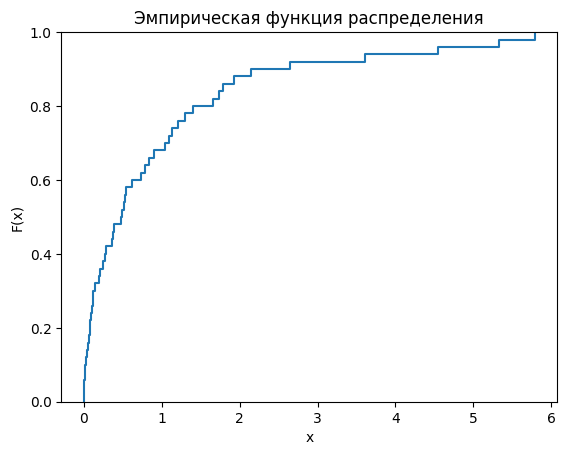

In [228]:
sns.ecdfplot(data_2) #построение эмпирической функции распределения

plt.title("Эмпирическая функция распределения");
plt.xlabel("x");
plt.ylabel("F(x)");
plt.show();

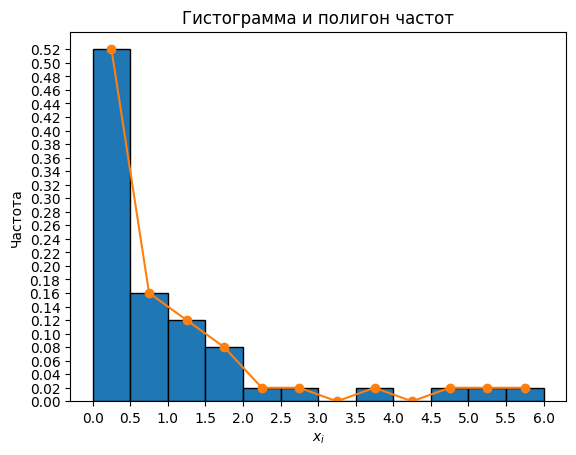

In [229]:
#гистограмма и полигон частот частот

h = 0.5
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
plt.xticks(bins)

#построение гистограммы
y, edges, _= plt.hist(data_2, edgecolor='black', bins=bins, weights=np.ones_like (data_2) / n) 

 #построение полигона
midpoints = 0.5*(edges[1:] + edges[:-1])
plt.plot(midpoints, y, '-o')

plt.yticks(np.arange(0, 0.54, 0.02))
plt.xlabel('$x_i$')
plt.ylabel('Частота')
plt.title('Гистограмма и полигон частот');

### b) Вычислить выборочные аналоги следующих числовых характеристик:
* Математического ожидания;
* Дисперсии;
* СКО;
* Медианы;
* Асимметрии;
* Эксцесса;
* Вероятности $\mathbb{P}\left(X \in [c, d]\right)$. 

In [230]:
#Математическое ожидание

sum_= 0
for item in data_2:
    sum_ += item #сумма Х
mn = sum_/n
print("Выборочное среднее: ", round(mn, 2))

Выборочное среднее:  0.96


Получаем выборочный аналог математического ожидания - выборочное среднее:
$$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i= 0.96$$

In [231]:
#Выборочный аналог дисперсии и СКО

dif=[]
for item in data_2:
    dif.append((item - mn)**2) #массив  с (X_i-X_cp)^2
S = round(sum(dif)/n, 2)

s = round(S**0.5, 2) #выборочное СКО

print("Выборочная дисперсия: ", S)
print("Выборочное СКО: ", s)

Выборочная дисперсия:  1.75
Выборочное СКО:  1.32


Получаем выборочный аналог дисперсии и СКО - выборочную дисперсию и выборочное СКО: 
$$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)=1.75$$ 
$$S=\sqrt{S^2}=1.32$$

In [232]:
#Выборочная медиана

med = stat.median(data_2)
print("25ый элемент вариационного ряда: ", data2_sort[24])
print("26ой элемент вариационного ряда: ", data2_sort[25])
print("Выборочная медиана: ", round(med, 3))

25ый элемент вариационного ряда:  0.482
26ой элемент вариационного ряда:  0.492
Выборочная медиана:  0.487


Выборочная медиана: <br><br>
$$np = 50\cdot\frac{1}{2}=25\in \mathbb Z \Rightarrow \large z_{50,\frac{1}{2}} = \normalsize \left[ X_{(25)},X_{(26)} \right) = \left[0.482, 0.492\right) \Rightarrow \large z_{50,\frac{1}{2}} \normalsize = \frac{0.492+0.482}{2} = 0.487$$

In [233]:
#Выборочная асимметрия

dif=[]
for item in data_2:
    dif.append((item - mn)**3) #массив  с (X_i-X_cp)^3
skew_X = round(sum(dif)/(n*s**3), 4)
print("Выборочный коэффициент асимметрии: ", skew_X)

Выборочный коэффициент асимметрии:  2.211


Выборочный коэффициент асимметрии: 
$$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3} = 2.21$$

In [234]:
#Выборочный эксцесс

dif=[]
for item in data_2:
    dif.append((item - mn)**4) ##массив  с (X_i-X_cp)^4
kurt_X = round(sum(dif)/(n*s**4) - 3, 3)
print("Выборочный коэффициент эксцесса: ", kurt_X)

Выборочный коэффициент эксцесса:  4.542


Выборочный коэффициент эксцесса:
$$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3 = 4.54$$

In [235]:
#нахождение P(c <= x <= d)

def F2(y):
    for i in range(n):
        if data2_sort[i] >= y:
            return i
    return n - 1

c, d = 0.00001, 1.280001
print("F(d) = ", F2(d)/n)
print("F(c) = ", F2(c)/n)
print("Вероятность P(c <= x <= d): ", F2(d)/n - F2(c)/n)

F(d) =  0.76
F(c) =  0.06
Вероятность P(c <= x <= d):  0.7


Выборочный аналог $\mathbb{P}\left(x \in \left[c, d\right]\right)$, c = 0.00, d = 1.28: <br><br>

$$\mathbb{P}\left(x \in \left[c, d\right]\right) = \mathrm{F}(d) - \mathrm{F}(c) = 0.76 - 0.06 = 0.7$$
 где $\mathrm{F}(x)$ - эмпирическая функция распределения

### c) В предположении, что исходные наблюдения являются выборкой из показательного распределения, построить оценку максимального правдоподобия параметров $\lambda$ и соответствующие оценки по методу моментов. Найти смещение оценок.

**Плотность нормального распределения:** 
$p_{\theta}(x) = \lambda\cdot e^{-\lambda\cdot x}$, при $x \ge 0$

* **Оценка максимального правдоподобия:** <br>

$\mathrm{L}\left(\vec{X}, \vec{\theta}\right) = \lambda^n \cdot e ^ {\lambda \displaystyle \sum_{i=1}^{n}x_{i}}$ <br>

$\mathrm{LL}\left(\vec{X}, \vec{\theta}\right) = n \ln{\lambda} - \lambda \displaystyle \sum_{i=1}^{n}x_{i}$ <br>

$\frac{\partial \mathrm{LL}}{ \partial \lambda} = \frac{n}{\lambda} \cdot - \displaystyle \sum_{i=1}^{n}x_{i} = 0$ , $\Rightarrow \widehat{\lambda} = \frac{1}{\overline{X}}$ <br>

Значит, $\widehat{\theta} = \frac{1}{\overline{X}}$ - ОМП <br>

* **Оценка методом моментов:** 

$\mathbb{E}X_1 = \frac{1}{\lambda}$ , $M_1 = \overline{X}$ <br>

Следовательно, $\widetilde{\theta} = \frac{1}{\overline{X}}$ - ОММ <br>

* **Смещение оценок:**

$\mathbb{E}_{\theta}\widehat{\lambda} = \mathbb{E}_{\theta}\widetilde{\lambda} = \mathbb{E}_{\theta}\frac{1}{\overline{X}} = \frac{1}{n} \sum \limits_{i = 1}^n\mathbb{E}_{\theta}\frac{1}{X_1} = \frac{1}{n} \cdot n \cdot \lambda = \lambda$ , следовательно оценки параметра $\lambda$ несмещённые. <br>



### d) Построить доверительныq интервал уровня значимости $\alpha_2 = 0.02$ для параметра $\lambda$.

Из пункта 2.с:<br>

$\widehat{\theta} = \widehat{\lambda} = \frac{1}{\overline{X}}$<br>

$\Large \frac{\partial LL}{\partial \lambda} = \frac{n}{\lambda} \cdot - \displaystyle \sum_{i=1}^{n}x_{i}$<br>

$\Large \frac{\partial^2 LL}{\partial \lambda^2} = \normalsize - \Large \frac{n}{\lambda^2}$<br>

$\mathrm{I}_n(\lambda) = - \large \mathbb{E}_{\theta}\frac{\partial^2 LL}{\partial \lambda^2} = \mathbb{E}_{\theta} \left(\frac{n}{\lambda^2}\right) = \frac{n}{\lambda^2}$ <br>

$\mathrm{I}(\lambda) = \lim \limits_{n \to \infty} \large \frac{1}{\lambda^2} = \frac{1}{\lambda^2}$ <br>

**Квантили:** 

Так как распределение симметричное: <br><br>
$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.02}{2} = 0.99$, где $\alpha = \alpha_1 = 0.02$<br><br>
$\mathrm{\Phi}(x_{\alpha}) = 0.99 \Rightarrow x_{\alpha} = 2.4$ (посчитано в коде с использованием scipy.stats).

*Асимптотический доверительный интервал:* <br><br>
$\left[\overline{X} - \sqrt{\frac{\overline{X}^2}{n}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{\overline{X}^2}{n}} \cdot x_{\alpha}\right] \ni \lambda$

Таким образом, АДИ уровня значимости $\alpha_1 = 0.02$ для параметра $\lambda$:
$$\left[0.63,1.29\right] \ni \lambda$$



In [236]:

alpha_2 = 0.02
df = n - 1
x_alpha = t.ppf(1 - alpha_2/2, df)
print(x_alpha)
left_a = mn - mn/n**0.5*x_alpha 
right_a = mn + mn/n**0.5*x_alpha 

print('Доверительный интервал для параметра : ', [round(left_a, 2), round(right_a, 2)])

2.4048917596601207
Доверительный интервал для параметра :  [0.63, 1.29]


### e) С использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с показательным распределением с параметром $\lambda = 0.42$. Проверить гипотезу на уровне значимости $\alpha_2 = 0.02$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Вычислим выборочный критерий Колмогорова $\eta = \sqrt{n}D_n$ используя Scipy

In [237]:
X = data_2
lambda_x = 0.42
lo = 1/lambda_x
scal = 1/(lambda_x)**2
n = len(X)

cdf = lambda x: expon.cdf(x, loc = lo, scale = scal)
Dn, _ = kstest(X, cdf)
eta = 50**0.5 * Dn
print('Критерий Колмогорова: ', round(eta, 2))

Критерий Колмогорова:  6.36


Зададим уровень значимости $\alpha = 0.02$. Вычислим квантиль Колмогорова $d_{1 - \alpha}$, чтобы построить критическую область $V_k = (d_{1 - \alpha},+ \infty)$

In [238]:
alpha = 0.02
d = kstwobign.ppf(1 - alpha)
print('Квантиль: ', round(d, 2))

Квантиль:  1.52


$V_k = (1.52, + \infty)$

$\eta \in V_k \Rightarrow$ гипотеза отвергается.

In [239]:
alpha = 0.02

while eta > d:
    alpha -= 0.0001
    d = kstwobign.ppf(1 - alpha)

print('Наибольшее значение уровня значимости, при котором нет оснований отвергнуть гипотезу: ', round(alpha, 3))

Наибольшее значение уровня значимости, при котором нет оснований отвергнуть гипотезу:  -0.0


### f) Используя гистограмму частот, построить критерии значимости $\chi^2$ проверки простой гипотезы согласия с показательным распределением с параметром $\lambda = 0.42$. Проверить гипотезу на уровне значимости $\alpha_2 = 0.02$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Разобьём числовую прямую на отрезки $G_1 = \left(- \infty, 1\right],  G_2 = \left(1, 1.5\right],  G_3 = \left(1.5, 2.5\right], G_4 = \left(2.5, +\infty \right)$

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} p_{\theta}(x)$, где $p_{\theta}(x) = \lambda e ^{-\lambda x} = 0.42 e ^{-0.42 x}$ - плотность показательного распределения.<br>
$\mathbb{P}_{1} = 0.21 \rightarrow n\mathbb{P}_1 = 10.8$ 

$\mathbb{P}_{2} = 0.14 \rightarrow n\mathbb{P}_2 = 7.42$

$\mathbb{P}_{3} = 0.22 \rightarrow n\mathbb{P} _3 = 10.87$

$\mathbb{P}_{4} = 1 - \left(\mathbb{P}_{1} + \mathbb{P}_{2} + \mathbb{P}_3 \right) = 0.42 \rightarrow n\mathbb{P}_4 = 20.87$

Тогда получилим статистику критерия $\chi^2 = \sum \limits_{i=1}^4 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 65.28$<br><br>
Из таблицы (дополнительно посчитано в коде): $\chi_{k-1, \alpha_2}^2 = \chi_{3, 0.02}^2 = 7.81$ <br><br>
Так как $\chi^2 > \chi_{3, 0.02}^2$ , то нет оснований принять гипотезу.

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, $\alpha = 6.46\cdot 10^{-16}$.

In [240]:
lam_x = 0.42
scal = 1/lam_x

edges = [1, 1.5, 2.5, 6] #интервалы

#подсчёт вероятностей
p1 = expon.cdf(edges[0], lam_x, scal)
p2 = expon.cdf(edges[1], lam_x, scal) - expon.cdf(edges[0], lam_x, scal)
p3 = expon.cdf(edges[2], lam_x, scal) - expon.cdf(edges[1], lam_x, scal)
p4 = 1 - p1 - p2 - p3
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)
print('P4 = ', p4, ', n*P4 = ', n * p4)

#количество значений, попавших в интервал
groups = [[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data2_sort:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3, ', n4 = ', n4)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4)
print("Статистика критерия: ", round(chi, 2))
print('Табличное значение:', round(chi2.ppf(1 - alpha_2, 3), 2))

if chi > chi2.ppf(1 - alpha_2, 3):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

#наибольший уровень значимости
alpha = 0.02
step = 0.00001
while chi > chi2.ppf(1 - alpha, 3):
    alpha -= step
print('Наибольший уровень значимости: ', alpha)

P1 =  0.21619890799606356 , n*P1 =  10.809945399803178
P2 =  0.1484642748513164 , n*P2 =  7.423213742565821
P3 =  0.2178907819310708 , n*P3 =  10.89453909655354
P4 =  0.4174460352215492 , n*P4 =  20.87230176107746
n1 =  34 , n2 =  6 , n3 =  5 , n4 =  5
Статистика критерия:  65.28
Табличное значение: 9.84
Гипотеза отвергается
Наибольший уровень значимости:  6.464250521583809e-16


### g) Построить критерий проверки значимости $\chi^2$ сложной гипотезы согласия с показательным распределением. Проверить гипотезу на уровне значимости $\alpha_2 = 0.02$. Вычислить наибольшее значение уровня значимости, на которос ещё нет оснований отвергнуть данную гипотезу.

Проведём группировку значений, как в предыдущем пункте.

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} p_{\theta}(x)$, где $p_{\theta}(x) = \lambda e ^{-\lambda x} = 0.96 e ^{-0.96 x}$ - плотность показательного распределения.<br>

$\mathbb{P}_{1} = 0.03 \rightarrow n\mathbb{P}_1 = 1.88$ 

$\mathbb{P}_{2} = 0.36 \rightarrow n\mathbb{P}_2 = 18.34$

$\mathbb{P}_{3} = 0.22  \rightarrow n\mathbb{P} _3 = 18.37$

$\mathbb{P}_{4} = 1 - \left(\mathbb{P}_{1} + \mathbb{P}_{2} + \mathbb{P}_3 \right) = 0.22 \rightarrow n\mathbb{P}_4 = 11.4$

Тогда получилим статистику критерия $\chi^2 = \sum \limits_{i=1}^4 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 569.23$

Из таблицы (дополнительно посчитано в коде): $\chi_{k-1-r, \alpha_2}^2 = \chi_{2, 0.02}^2 = 7.82$ 

Так как $\chi^2 < \chi_{1, 0.05}^2$ , то нет оснований отвергнуть гипотезу. 

Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезочень мало.

In [241]:
lam_x = 0.96
scal = 1/lam_x
alpha_2 = 0.02
edges = [1, 1.5, 2.5, 6] #интервалы

#подсчёт вероятностей
p1 = expon.cdf(edges[0], lam_x, scal)
p2 = expon.cdf(edges[1], lam_x, scal) - expon.cdf(edges[0], lam_x, scal)
p3 = expon.cdf(edges[2], lam_x, scal) - expon.cdf(edges[1], lam_x, scal)
p4 = 1 - p1 - p2 - p3
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)
print('P4 = ', p4, ', n*P4 = ', n * p4)

#количество значений, попавших в интервал
groups = [[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data2_sort:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3, ', n4 = ', n4)

#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha_2, 2))

if chi > chi2.ppf(1 - alpha_2, 2):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

#наибольший уровень значимости
alpha = 0.02
step = 0.000001
while chi > chi2.ppf(1 - alpha, 2):
    alpha -= step
print('Наибольший уровень значимости: ', alpha)

P1 =  0.03767206727838963 , n*P1 =  1.8836033639194814
P2 =  0.36685539048234056 , n*P2 =  18.342769524117028
P3 =  0.36747034202233897 , n*P3 =  18.37351710111695
P4 =  0.22800220021693074 , n*P4 =  11.400110010846538
n1 =  34 , n2 =  6 , n3 =  5 , n4 =  5
Статистика критерия:  569.2335570315786
Табличное значение: 7.824046010856292
Гипотеза отвергается
Наибольший уровень значимости:  -9.999999993469481e-07


### h) Построить наиболее мощный критерий проверки простой гипотезы о показательности с параметром $\lambda = 0.42$ при альтернативе нормальности с параметром $\lambda = 0.71$. Проверить гипотезу на уровне значимости $\alpha_2 = 0.02$. Что получится, если поменять местами основновную и альтернативную гипотезы?

*Нулевая гипотеза* $H_0: \theta_0 = \lambda_{0} = 0.42$

*Альтернативная гипотеза* $H_1: \theta_1 = \lambda_{1} = 0.71$

*Функция правдоподобия:*

$\mathrm{L}\left(\vec{X}, \vec{\theta}\right) = \lambda ^ n e^{-\lambda \cdot n \overline{X}}$

*Статистика отношения правдоподобия:*

$\mathrm{LR}\left(\vec{X}, \vec{\theta_0}, \vec{\theta_1}\right) = \frac{\mathrm{L}\left(\vec{X}, \vec{\theta_1}\right)}{\mathrm{L}\left(\vec{X}, \vec{\theta_0}\right)} = \exp{(-\lambda_{0} n \overline{X} + \lambda_{1} n \overline{X})} = \exp{(\sum \limits_{i = 1}^n x_i(\lambda_{1}-\lambda_{0}))}$ - монотонно возрастающая функция от $\sum \limits_{i = 1}^n x_i$.

$\sum \limits_{i = 1}^n x_i(\lambda_{1}-\lambda_{0}) > \ln{c}$

$\overline{X} > \large \frac{\ln{c}}{n(\lambda_{1}- \lambda_{0})}$

В силу монотонности статистики LR относительно $\overline{X}$:

$\mathrm{LR} > c \iff \overline{X} > c^*$

$\mathrm{LR} < c \iff \overline{X} < c^*$

Тогда:

$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} > c^* \\ p, \overline{X} = c^* \\ 0, \overline{X} < c^*\\ \end{array}\right.$$
  
Используя ЦПТ, получается эквивалентный критерий:

$\sqrt{n} \frac{\overline{X} - 1/\lambda_{0}}{1/\lambda_{0}^2} \sim \mathcal{N}(0, 1)$ при $H_0$

$\sqrt{n} \frac{\overline{X} - 1/\lambda_{0}}{1/\lambda_{0}^2} = -1.77$

Квантиль:

$c^* : \Phi(c^*) = 1 - \alpha_2 = 1 - 0.02 = 0.98 \Rightarrow c^* = 2.06$

Тогда:
$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} > 1.65 \\ p, \overline{X} = 1.65 \\ 0, \overline{X} < 1.65\\ \end{array}\right.$$
Так как $\sqrt{n} \frac{\overline{X} - a_0}{\sigma} < c^*$, то нет оснований отвергнуть гипотезу.

In [242]:
c_alpha = 0
while norm.cdf(c_alpha) <= 0.98:
    c_alpha += 0.01
print('c* =', c_alpha)
lam_x = 0.42
clt = ((mn - 1/lam_x)/(1/(lam_x)**2)) * n**0.5
print('LR =', clt)

c* = 2.06
LR = -1.7715074912703028


**Поменяем местамим основную и альтернативную гипотезы:**

*Нулевая гипотеза* $H_0: \theta_0 = \lambda_{1} = 0.71$

*Альтернативная гипотеза* $H_1: \theta_1 = \lambda_{0} = 0.42$

*Статистика отношения правдоподобия:*

$\mathrm{LR}\left(\vec{X}, \vec{\theta_0}, \vec{\theta_1}\right) = \frac{\mathrm{L}\left(\vec{X}, \vec{\theta_1}\right)}{\mathrm{L}\left(\vec{X}, \vec{\theta_0}\right)} = \exp{(-\lambda_{1} n \overline{X} + \lambda_{0} n \overline{X})} = \exp{(\sum \limits_{i = 1}^n x_i(\lambda_{0}-\lambda_{1}))}$ - монотонная функция от $\sum \limits_{i = 1}^n x_i$.

$\sum \limits_{i = 1}^n x_i(\lambda_{0}-\lambda_{1}) > \ln{c}$

Так как $\lambda_{0} < \lambda_{1}$, то меняем знак неравенства:

$\overline{X} > \large \frac{\ln{c}}{n(\lambda_{0}-\lambda_{1})}$

В силу монотонности статистики LR относительно $\overline{X}$:

$\mathrm{LR} > c \iff \overline{X} < c^*$

$\mathrm{LR} < c \iff \overline{X} > c^*$

Тогда получим:
$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} < c^* \\ p, \overline{X} = c^* \\ 0, \overline{X} > c^*\\ \end{array}\right.$$
  
Используя ЦПТ, получаем эквивалентный критерий:

$\sqrt{n} \frac{\overline{X} - 1/\lambda_{1}}{1/\lambda_{1}^2} \sim \mathcal{N}(0, 1)$ при $H_1$

$\mathbb{P}\left(\sqrt{n}\frac{\overline{X} - 1/\lambda_{1}}{1/\lambda_{1}^2} \geq \sqrt{n}\frac{c^* - 1/\lambda_{1}}{1/\lambda_{1}^2}\right) = 1 - \Phi\left(\sqrt{n}\frac{c^* - 1/\lambda_{1}}{1/\lambda_{1}^2}\right) = \alpha_2$

$\sqrt{n}\frac{c^* - 1/\lambda_{1}}{1/\lambda_{1}^2} = x_{\alpha}$

$x_{\alpha} : \Phi(x_{\alpha}) = 1 - \alpha_2 = 1 - 0.02 = 0.98 \Rightarrow x_{\alpha} = 2.06 \Rightarrow c^* = 1.98$

$$ \phi(x) =\left\{\begin{array}{l} 1, \overline{X} < 1.98 \\ p, \overline{X} = 1.98 \\ 0, \overline{X} > 1.98\\ \end{array}\right.$$

$\overline{X} = 0.96$

Так как $\overline{X} < c^*$, то гипотеза отвергается.

In [243]:
x_alpha = 0
while norm.cdf(x_alpha) <= 0.98:
    x_alpha += 0.01
print('x_alpha =', x_alpha)

lam_x = 0.71

lam_x12 = 1/(lam_x)**2
lam_x1 = 1/(lam_x) 
c_star = (x_alpha * lam_x12)/n**0.5 + lam_x1
print('c =', c_star)

x_alpha = 2.06
c = 1.986367771967581


### i) В пунктах (c) - (h) заменить семейство показательных распределенеий на семейство ГАММА - распределений с плотностями:
$$\mathbb{p}_{\theta} = \frac{\sqrt{\lambda}\exp{-\lambda x/2}}{\sqrt{2\pi x}}$$
$L(\theta, \vec{x})= \prod\limits_{i=1}^n \frac{\sqrt{\lambda} \exp(-\lambda x_i/2)}{\sqrt{2 \pi x_i}} = \lambda^{\frac{n}{2}} \cdot  (2\pi)^{-\frac{n}{2}}\cdot \exp(-\frac{\lambda}{2}  \sum\limits_{i=1}^nx_i ) \cdot  \prod\limits_{i=1}^n \frac{1}{\sqrt x_i}  $ <br>
Чтобы упростить вычисления, напишем логарифмическую функцию правдоподобия: <br>
$LL(\theta, \vec{x})= \frac{n}{2} \ln\lambda - \frac{n}{2} \ln{2\pi} - \frac{\lambda}{2} \sum\limits_{i=1}^nx_i + \ln{\prod\limits_{i=1}^n \frac{1}{\sqrt x_i}} $ <br>
Вычислим производную логарифмической функции правдоподобия по параметру $\lambda$: <br>
$\frac{\partial LL(\theta, \vec{x})}{\partial \lambda} = \frac{n}{2\lambda} -  \frac{\sum\limits_{i=1}^nx_i}{2}$ <br>
Приравниваем производную к 0 и вычисляем $\lambda$: <br>
$\frac{n}{\lambda} -  \sum\limits_{i=1}^nx_i = 0$ <br>
$\hat{\lambda}=\frac{n}{\sum\limits_{i=1}^nx_i} = \frac{1}{\overline{x}} $ <br>
$\hat\theta = \hat{\lambda}= \frac{1}{\overline{x}}$ - ОМП <br>

ОММ <br>
$a = \frac{1}{2}, b = \frac{2}{\lambda}$ <br>
$ \mathbb{E}{X_1} = ab = \frac{1}{ \lambda}$ <br>
$M_1 = \overline{x} $ <br>
 $\frac{1}{\lambda} = \overline{x} $ <br>
$\widetilde{\theta} = \widetilde{\lambda} = \frac{1}{\overline{x}}$ - ОММ <br>

НРМД <br>
$L(\theta, \vec{x})=  \lambda^{\frac{n}{2}} \cdot  (2\pi)^{-\frac{n}{2}}\cdot \exp(-\frac{\lambda}{2}  \sum\limits_{i=1}^nx_i ) \cdot  \prod\limits_{i=1}^n \frac{1}{\sqrt x_i}  $ <br> 
$g(T) = \lambda^{\frac{n}{2}} \cdot  (2\pi)^{-\frac{n}{2}}\cdot \exp(-\frac{\lambda}{2}  \sum\limits_{i=1}^nx_i ) $ <br>
$h(x) = \prod\limits_{i=1}^n \frac{1}{\sqrt x_i} $ <br>
$ T=\sum\limits_{i=1}^n x_i$  - МДС. Так как гамма-распределение принадлежит экспоненциальному семейству, то $T$ - ПДС <br>
$\mathbb{E}_\theta \hat{\theta} = \mathbb{E}_\theta  \frac{1}{\overline{x}} = \mathbb{E}_\theta \frac{n}{\sum\limits_{i=1}^nx_i} = n \mathbb{E}_\theta \left(\sum\limits_{i=1}^nx_i\right)^{-1} = \begin{bmatrix}\gamma=-1\\\alpha = n \\ \beta = \frac{1}{\lambda}\end{bmatrix} = n \cdot \lambda \cdot \frac{\Gamma(n-1)}{\Gamma(n)} = n \cdot \lambda \cdot \frac{\Gamma(n-1)}{(n-1)\Gamma(n-1)} = \frac{n}{n-1} \lambda$  - смещенная оценка <br>
$\widetilde{\theta} = \frac{n-1}{n}\hat{\theta}$  <br>
$\mathbb{E}_\theta \widetilde{\theta} = \mathbb{E}_\theta \frac{n-1}{n}\hat{\theta} = \frac{n-1}{n} \frac{n}{n-1} \lambda = \lambda  $ - НРМД 

#### **i.d) $\alpha_2$ = 0.02**

Построение АДИ на базе ОМП: <br>
$\theta = \lambda \Rightarrow \hat\theta = \overline{x}$ <br>
$\sqrt{n}\left( \widehat{\theta}(\vec{x})-\theta \right)\sim \mathcal{N}\left( 0, \frac{1}{I(\theta)} \right)$<br>
$I(\theta) = \lim\limits_{n\to\infty}{\frac{I_n(\theta)}{n}}$ <br>
$I_n(\theta) = -\mathbb{E}_\theta\frac{\partial^2{LL}}{\partial\theta^2} $ <br>
Из предыдущего пункта мы нашли: <br>
$\frac{\partial LL(\theta, \vec{x})}{\partial \lambda} = \frac{n}{2\lambda} -  \frac{\sum\limits_{i=1}^nx_i}{2}$ <br>
Тогда: <br>
$\frac{\partial^2 LL(\theta, \vec{x})}{\partial \lambda^2} =-\frac{n}{2\lambda^2}  $ <br>
$I_n(\lambda) =  - \mathbb{E}{\left(-\frac{n}{\lambda^2} \right)} = \frac{n}{2\lambda^2}  $ <br>
$I(\lambda) = \lim\limits_{n\to\infty}{\frac{\frac{n}{\lambda^2} }{n}} = \frac{1}{2\lambda^2} $ <br>
Выбираем: <br>
$x_\alpha: \Phi(x_\alpha)=1-\frac{\alpha}{2}= 1-\frac{0.02}{2} = 0.99 \Rightarrow x_{0.99} = 2.33 $<br> 
Асимптотический доверительный интервал: <br>
$\left[\frac{1}{\overline{x}}- \frac{x_{0.99}}{\sqrt{\frac{n \overline{x}^2}{2}  }},\frac{1}{\overline{x}} + \frac{x_{0.99}}{\sqrt{\frac{n \overline{x}^2}{2}  }} \right] \ni \lambda$ <br>
$ 0.557\leq \lambda \leq 1.525 $


In [244]:
alpha = 0.02
x_a = norm.ppf(1-alpha/2)
left = 1/mn - x_a/(np.power(n*mn*mn/2,0.5))
right = 1/mn + x_a/(np.power(n*mn*mn/2,0.5))
print("Асимптотический доверительный интервал:")
print("Лямбда принадлежит интервалу от", round(left,3), "до", round(right,3))

Асимптотический доверительный интервал:
Лямбда принадлежит интервалу от 0.557 до 1.525


## Выводы
В данной практической работе были преобретены навыки работы с методами математической статистики для решения задач статистического анализа. Так же изучены и применены встроенные методы среды программирования Python для реализации необходимых методов.

Была проведа статистическая обработка данных: найдены выборочные аналоги числовых характеристик, построены ОМП и ОММ оценки, доверительные интервалы, проведена работа с гипотезами.

Были проблемы с нахождением наиболее мощного критерия и проверкой гипотез.